# Project 4 Part 1

In [1]:
#Full Name: Hannah Ploutz

## Imports & Load Data

In [69]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import numpy as np

In [4]:
# Define the folder path where the files are located
folder_path = 'Data/Chicago/'

# Define the pattern to match the CSV.gz files
file_pattern = folder_path + '*.csv'

# Get a list of all matching file paths
file_paths = glob.glob(file_pattern)

# Create an empty list to store individual dataframes
dfs = []

# Iterate over the file paths and read each CSV.gz file as a dataframe
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all dataframes into a single merged dataframe
merged_df = pd.concat(dfs, ignore_index=True)

# Display the merged dataframe
merged_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
3,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834343 entries, 0 to 7834342
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 612.7+ MB


### Feature Engineering

In [11]:
#convert date to datetime
merged_df['Date'] = pd.to_datetime(merged_df["Date"])

In [12]:
## feature engineering for dates
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month_name()
merged_df['day of month'] = merged_df['Date'].dt.day
merged_df['day of week'] = merged_df['Date'].dt.day_name()
merged_df['hour'] = merged_df['Date'].dt.hour
merged_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour
0,1323184,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996,2001,January,1,Monday,13
1,1328315,2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929,2001,January,1,Monday,1
2,1311933,2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214,2001,January,1,Monday,1
3,1330412,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623,2001,January,1,Monday,1
4,1311735,2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001,January,1,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834338,13122057,2023-06-28 00:47:00,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644,2023,June,28,Wednesday,0
7834339,13122505,2023-06-28 12:50:00,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762,2023,June,28,Wednesday,12
7834340,13122064,2023-06-28 00:50:00,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846,2023,June,28,Wednesday,0
7834341,13122624,2023-06-28 12:50:00,ROBBERY,AGGRAVATED,SIDEWALK,False,False,513,5.0,9.0,41.694309,-87.620794,2023,June,28,Wednesday,12


In [18]:
merged_df.set_index('Date', inplace=True)

In [28]:
merged_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour
Date,,,,,,,,,,,,,,,,
2001-01-01 13:00:00,1323184,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996,2001,January,1,Monday,13
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929,2001,January,1,Monday,1
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214,2001,January,1,Monday,1
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623,2001,January,1,Monday,1
2001-01-01 01:00:00,1311735,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001,January,1,Monday,1


### Imputation

## Stakeholder Questions to Answer

### Question 1

**Comparing Police Districts:**
- Which district has the most crimes? Which has the least?

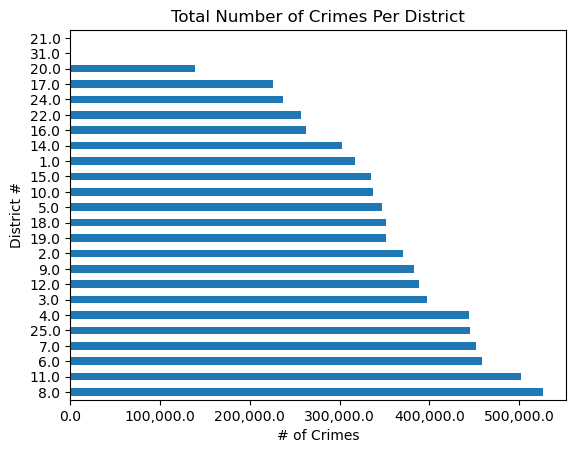

In [102]:
# Sort the dataframe by the value counts of the 'District' column in ascending order
sorted_df = merged_df['District'].value_counts().sort_values(ascending=True)

# Plotting the sorted value counts by the district
ax = sorted_df.plot(kind='barh', xlabel='# of Crimes', ylabel='District #',
                   title='Total Number of Crimes Per District')

# Formatting x-axis labels with commas every 3 numbers
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

# Reverse the y-axis to have the lowest district at the top
ax.invert_yaxis()

- District 8.0 has the most crimes overall
- District 21.0 and 31.0 have the least crimes overall

### Question 2

**Crimes Across the Years:**
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [71]:
# Resample the data yearly and count the number of crimes for each year
df_yearly_crime = merged_df.resample("Y").size().interpolate()

In [77]:
df_yearly_crime.isna().sum()

0

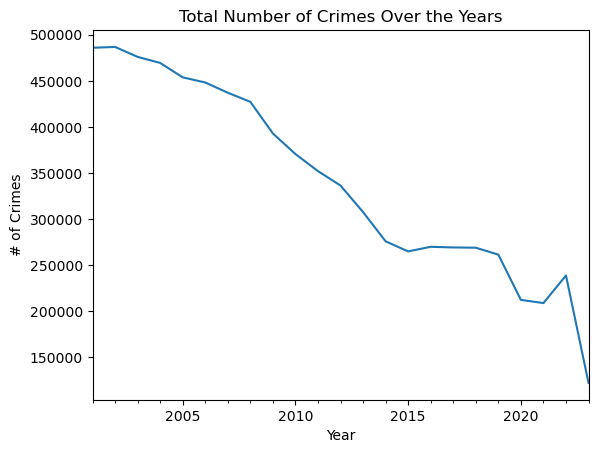

In [101]:
# Plot total crimes across years
df_yearly_crime.plot(kind='line', title='Total Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.show()

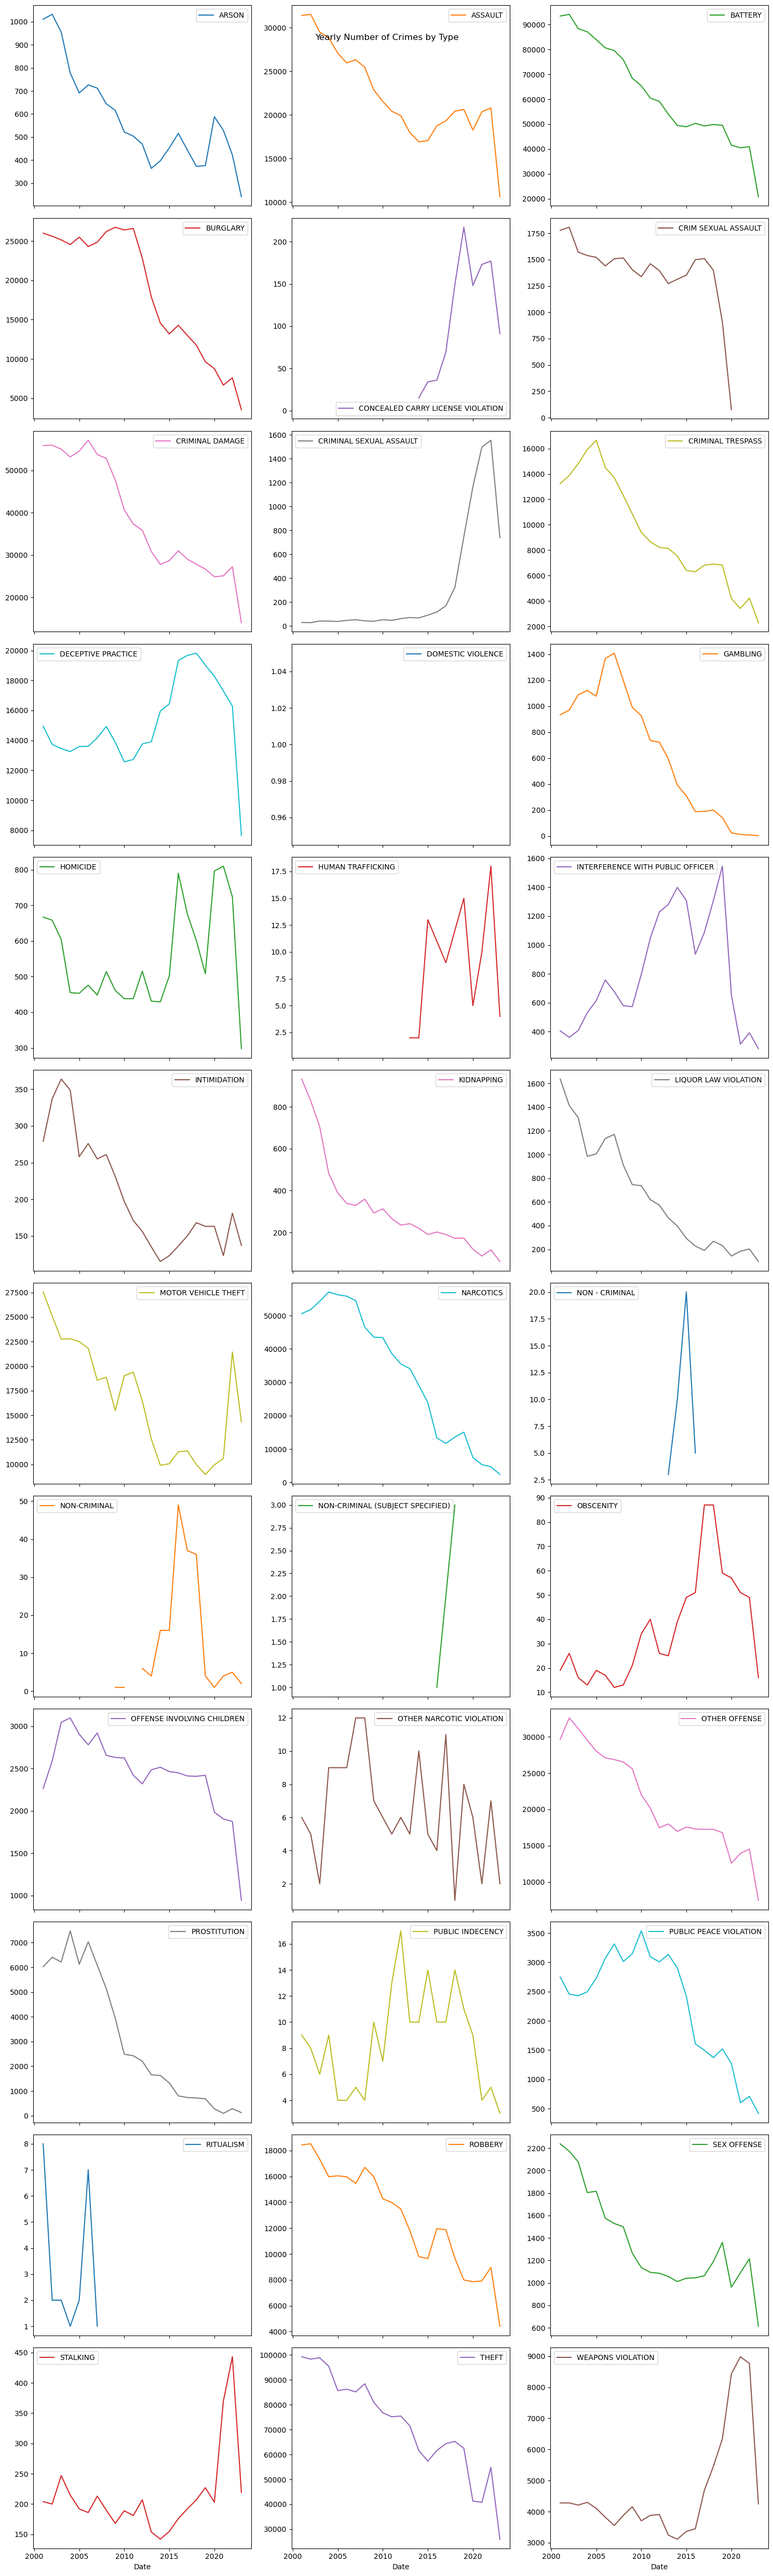

In [96]:
# Group data by crime type and year and count occurrences
crime_by_year = merged_df.dropna().copy #drop null values
crime_by_year = merged_df.groupby([merged_df.index.year, 'Primary Type']).size().unstack()

# Plot the data
crime_by_year.plot(kind='line', subplots=True, layout=(-1, 3), figsize=(15, 50), title='Yearly Number of Crimes by Type')
plt.tight_layout()
plt.show()


- Overall crime is decreasing, but it appears that Non-Criminal (subject specified) is doing the oppisite and has a large upwards spike

### Question 3

**Comparing Months:**
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [36]:
## make df that is resampled to correct freq
df_crime = merged_df.resample("M").size()
df_crime

Date
2001-01-31    38119
2001-02-28    33786
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
              ...  
2023-02-28    18254
2023-03-31    20501
2023-04-30    20435
2023-05-31    21757
2023-06-30    20147
Freq: M, Length: 270, dtype: int64

In [52]:
## get the date of the max crimes
date_most_crimes = df_crime.idxmax()
date_most_crimes

Timestamp('2002-07-31 00:00:00', freq='M')

In [53]:
## get the date of the min crimes
date_min_crimes = df_crime.idxmin()
date_min_crimes

Timestamp('2020-04-30 00:00:00', freq='M')

In [57]:
# how many crimes at least?
least_crimes_count = df_crime.loc[date_min_crimes]

In [58]:
# how many crimes at most?
most_crimes_count = df_crime.loc[date_most_crimes]

In [59]:
# Print the months with the most and least crimes
print("Months with the most crime:")
print(date_most_crimes)
print("Months with the least crime:")
print(date_min_crimes)

Months with the most crime:
2002-07-31 00:00:00
Months with the least crime:
2020-04-30 00:00:00


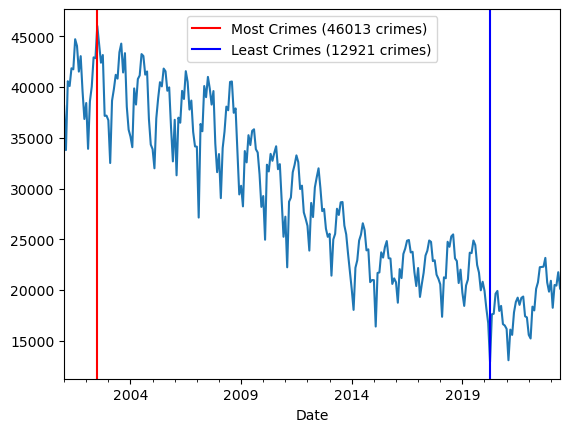

In [62]:
# Plot the df and add vertical line at month with most crimes
ax = df_crime.plot()
ax.axvline(date_most_crimes, color='red', label=f'Most Crimes ({most_crimes_count} crimes)')
ax.axvline(date_min_crimes, color='blue', label=f'Least Crimes ({least_crimes_count} crimes)')

# Display the legend
ax.legend()

# Show the plot
plt.show()

In [97]:
# Group data by crime type and month and count occurrences
crime_by_month = merged_df.groupby([merged_df.index.month, 'Primary Type']).size().unstack()

# Find the month with most and least crime occurrences for each type of crime
most_crime_month = crime_by_month.idxmax()
least_crime_month = crime_by_month.idxmin()

# Compute the month with the most and least crimes overall
date_most_crimes = crime_by_month.sum(axis=1).idxmax()
date_min_crimes = crime_by_month.sum(axis=1).idxmin()

# Find the crime types that do not follow the overall pattern
crimes_not_follow = (most_crime_month != date_most_crimes) | (least_crime_month != date_min_crimes)

# Print the crimes that do not follow the overall pattern
print("Individual crimes that do not follow the pattern:")
print(crimes_not_follow[crimes_not_follow].index)


Individual crimes that do not follow the pattern:
Index(['ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')


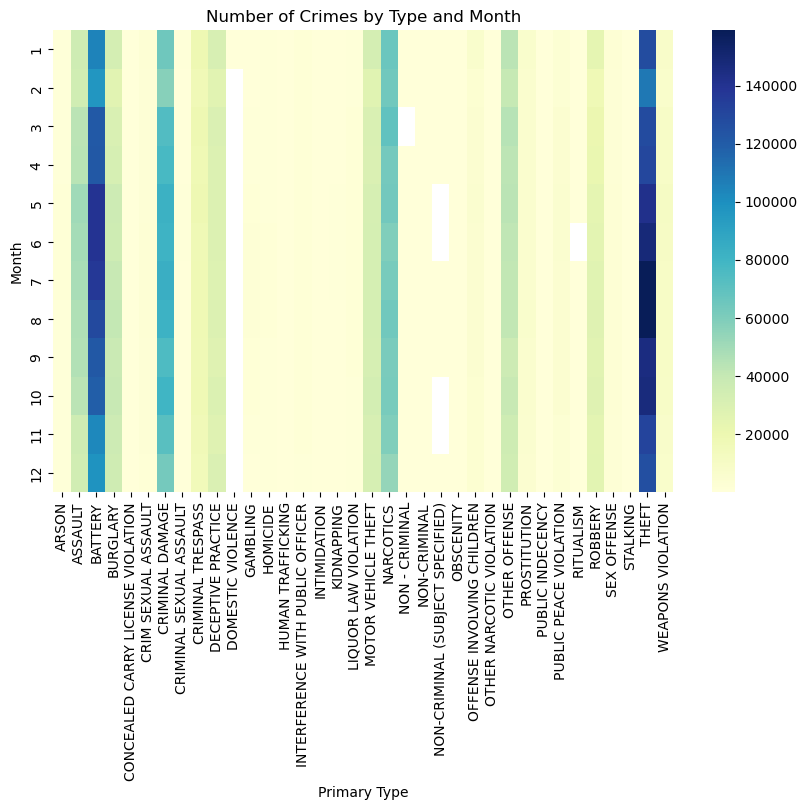

In [98]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(crime_by_month, cmap="YlGnBu")
plt.title('Number of Crimes by Type and Month')
plt.xlabel('Primary Type')
plt.ylabel('Month')
plt.show()

- You can see from the above heatmap that every month of the year, Battery and Theft have the highest number of crimes